# Project: Ford Go Bike Data Anaylsis

## by Aly Reda

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
</ul>


<a id='intro'></a>
## Introduction

#### Feb 2019 Ford Bike rides all over CA specially San Francisco
<br>

### What is the structure of your dataset?
  

> The original Bay Wheels's trip dataset contains 183412 rides and 16 features. I added 13 more features for analysis purpose.

1. duration_sec
2. start_time
3. end_time
4. start_station_id
5. start_station_name
6. start_station_latitude
7. start_station_longitude
8. end_station_id
9. end_station_name
10. end_station_latitude
11. end_station_longitude  
12. bike_id                
13. user_type              
14. member_birth_year      
15. member_gender          
16. bike_share_for_all_trip
17. duration_hr            
18. distance_km            
19. speed_km/hr            
20. member_age             
21. age_group              
22. start_hour             
23. end_hour               
24. day                    
25. weekday                
26. month                  
28. quarter                
29. season


### What is/are the main feature(s) of interest in your dataset?
1. Duration , Distance , Speed
2. Age, Gender, Membership Status
3. Month, Weekday, Hour , Season , Quarter


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Columns should be added to assist analysis:
1. duration_hr
2. distance_km
3. speed_km/hr
4. member_age 
5. age_group
6. start_hour
7. end_hour
8. day
9. weekday
10. month
11. quarter
12. season


<a id='wrangling'></a>
## 1. Data Wrangling

### 1.a import packages

In [246]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import sin, cos, sqrt, atan2, radians
from datetime import date, datetime
import folium

%matplotlib inline

### 1.b Functions

In [666]:
#functoin to calculate the distance between two lang and lot 
def distance_between_two_points(lat1 ,lon1 , lat2 , lon2 ):
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6373.0 * c
    return distance

#function to get the season from the date
def get_season(now):
    Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
    seasons = [('Winter', (date(Y,  1,  1),  date(Y,  3, 20))),
               ('Spring', (date(Y,  3, 21),  date(Y,  6, 20))),
               ('Summer', (date(Y,  6, 21),  date(Y,  9, 22))),
               ('Autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
               ('Winter', (date(Y, 12, 21),  date(Y, 12, 31)))]
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons if start <= now <= end)



### 1.c Database Exploring

In [667]:
#load the database
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [668]:
#info of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [678]:
# checking for null values
df.isnull().sum(axis = 0)

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [679]:
#describe
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

### 1.d Database Cleaning

In [5]:
#replace inf by null
df.replace([np.inf, -np.inf], np.nan , inplace=True)
#remove all null value
df.dropna( inplace=True)
#convert duration to hr 
df['duration_hr'] = df['duration_sec']/3600
#get the distance between two lat and long
df['distance_km'] = df.apply(lambda x: distance_between_two_points(x['start_station_latitude'] ,x['start_station_longitude'] ,x['end_station_latitude'] ,x['end_station_longitude'] ), axis=1)
#get the speed from the duration and the distance
df['speed_km/hr'] = df['distance_km']/df['duration_hr']
#remove all distance equel 0
#same start and end points
df = df[df['distance_km']!=0]
#convert birthday into int
df['member_birth_year']=df['member_birth_year'].astype('int')
#get the age of the member
df['member_age']=2019-df['member_birth_year']
#create age group to make it easy to compare
df['age_group'] = (((df['member_age']//10)%10)*10).astype('str') + 's'
#get the start hour of the trip
df['start_hour'] = pd.DatetimeIndex(df['start_time']).hour
#get the end hour of the trip
df['end_hour'] = pd.DatetimeIndex(df['end_time']).hour
#get the day of the trip
df['day'] = pd.DatetimeIndex(df['start_time']).day
#get the weekday of the trip
df['weekday'] = df[['start_time']].apply(lambda x: datetime.strftime(pd.to_datetime(x['start_time']), '%a'), axis=1)
#get the month of the trip
df['month'] = pd.DatetimeIndex(df['start_time']).month
#get the Quarter Q1 , Q2 , Q3 , Q4
df['quarter'] = 'Q' + pd.DatetimeIndex(df['start_time']).quarter.astype('str')
#get the season of the trip
df['season'] =df.apply(lambda x: get_season( pd.to_datetime(x['start_time']) ), axis=1)
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
2  Powell St BART Station (Market St at 4th St)             37.786375  ...   
3                        Central Ave at Fell St             37.773311  ...   
4                         10th Ave at E 15th St             37.792714  ...   
5                            Broadway at Kearny             37.798014  ...   

   speed_km/hr  member_age age_group  start_hour end_hour day  weekday  month  \
0     0.037589          35       30s          17        8  28      Thu      2   
2     0.157458          47       40s          12        5  28      Thu      2   
3     0.025732          30       30s          17        4  28      Thu      2   
4     5.473948          45       40s          23        0  28      Thu      2   
5     6.692524          60       60s          23        0  28      Thu      2   

   quarter  season  
0       Q1  Winter  
2       Q1  Winter  
3       Q1  Winter  
4       Q1  Winter  
5       Q1  Winter  

[5 rows x 28 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171494 entries, 0 to 183411
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             171494 non-null  int64  
 1   start_time               171494 non-null  object 
 2   end_time                 171494 non-null  object 
 3   start_station_id         171494 non-null  float64
 4   start_station_name       171494 non-null  object 
 5   start_station_latitude   171494 non-null  float64
 6   start_station_longitude  171494 non-null  float64
 7   end_station_id           171494 non-null  float64
 8   end_station_name         171494 non-null  object 
 9   end_station_latitude     171494 non-null  float64
 10  end_station_longitude    171494 non-null  float64
 11  bike_id                  171494 non-null  int64  
 12  user_type                171494 non-null  object 
 13  member_birth_year        171494 non-null  int32  
 14  memb

In [7]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  171494.000000     171494.000000           171494.000000   
mean      682.107461        138.318676               37.771502   
std      1534.333862        111.249829                0.099576   
min        61.000000          3.000000               37.317298   
25%       323.000000         47.000000               37.770407   
50%       508.000000        104.000000               37.780760   
75%       779.000000        239.000000               37.797320   
max     84548.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            171494.000000   171494.000000         171494.000000   
mean               -122.352280      135.872689             37.771700   
std                   0.116942      110.913567              0.099477   
min                -122.453704        3.000000             37.317298   
25%                -122.411901       44.000000             37.770407   
50%                -122.398279      100.000000             37.781010   
75%                -122.283127      232.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year    duration_hr  \
count          171494.000000  171494.000000      171494.000000  171494.000000   
mean             -122.351846    4482.423822        1984.804722       0.189474   
std                 0.116494    1659.993750          10.084265       0.426204   
min              -122.453704      11.000000        1878.000000       0.016944   
25%              -122.411647    3796.000000        1980.000000       0.089722   
50%              -122.397437    4962.000000        1987.000000       0.141111   
75%              -122.287610    5506.000000        1992.000000       0.216389   
max              -121.874119    6645.000000        2001.000000      23.485556   

         distance_km    speed_km/hr     member_age     start_hour  \
count  171494.000000  171494.000000  171494.000000  171494.000000   
mean        1.724668      11.062090      34.195278      13.445421   
std         1.081460       3.635686      10.084265       4.738131   
min         0.013291       0.004237      18.000000       0.000000   
25%         0.938482       8.893044      27.000000       9.000000   
50%         1.455140      11.164208      32.000000      14.000000   
75%         2.249706      13.423896      39.000000      17.000000   
max        69.491049      36.021278     141.000000      23.000000   

            end_hour            day     month  
count  171494.000000  171494.000000  171494.0  
mean       13.594890      15.305865       2.0  
std         4.750714       8.038374       0.0  
min         0.000000       1.000000       2.0  
25%         9.000000       8.000000       2.0  
50%        14.000000      15.000000       2.0  
75%        18.000000      22.000000       2.0  
max        23.000000      28.000000       2.0

<a id='univariate'></a>
## 2. Univariate Exploration

In [374]:
df_bike = df.copy()
df_bike.shape

(171494, 28)

### 2.a Duration Outliners Checking

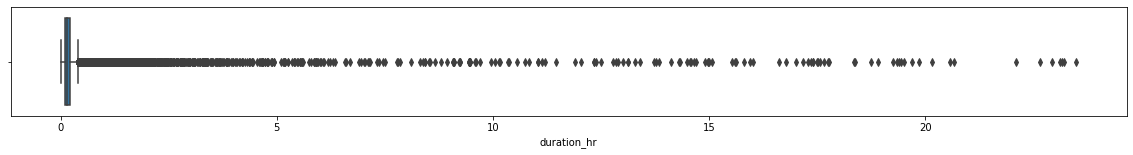

In [375]:
plt.figure(figsize = [20, 2])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_bike, x='duration_hr', color=base_color);

In [376]:
df_bike['duration_hr'].describe(percentiles = [0.01, 0.05, 0.95, 0.99])

count    171494.000000
mean          0.189474
std           0.426204
min           0.016944
1%            0.030278
5%            0.046944
50%           0.141111
95%           0.404444
99%           0.768353
max          23.485556
Name: duration_hr, dtype: float64

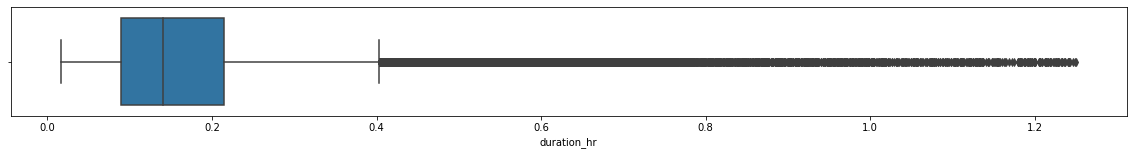

In [377]:
df_bike = df_bike.query('duration_hr <= 1.25')
plt.figure(figsize = [20, 2])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_bike, x='duration_hr', color=base_color);

> #### 99% of the duration less than an hour
>> ##### remove duration more than 1.25 hour (the user forget to end the trip)

### 2.b Member Age Outliners Checking

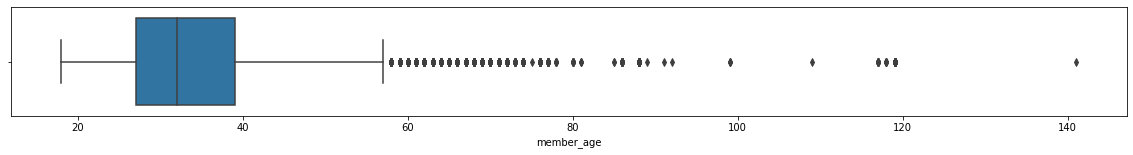

In [378]:
plt.figure(figsize = [20, 2])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_bike, x='member_age', color=base_color);


In [379]:
df_bike['member_age'].describe(percentiles = [0.01, 0.05, 0.95, 0.99])

count    170691.000000
mean         34.191522
std          10.083568
min          18.000000
1%           20.000000
5%           22.000000
50%          32.000000
95%          55.000000
99%          64.000000
max         141.000000
Name: member_age, dtype: float64

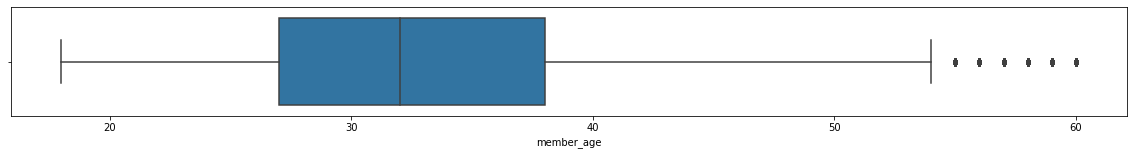

In [380]:
# Remove all rows with age <= 60
df_bike = df_bike.query('member_age <= 60')
plt.figure(figsize = [20, 2])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_bike, x='member_age', color=base_color);

> #### 99% of the Ages less than 64 years old
>> ##### remove Ages above 60 (the user may add rondom age)

### 2.c Distance Outliners Checking

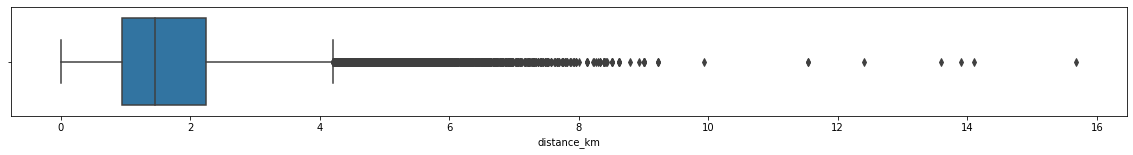

In [382]:
plt.figure(figsize = [20, 2])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_bike, x='distance_km', color=base_color);

In [381]:
df_bike['distance_km'].describe(percentiles = [0.01, 0.05, 0.95, 0.99])

count    167319.000000
mean          1.725126
std           1.066031
min           0.013291
1%            0.307208
5%            0.489538
50%           1.461044
95%           3.808051
99%           5.073087
max          15.678876
Name: distance_km, dtype: float64

(156614, 28)

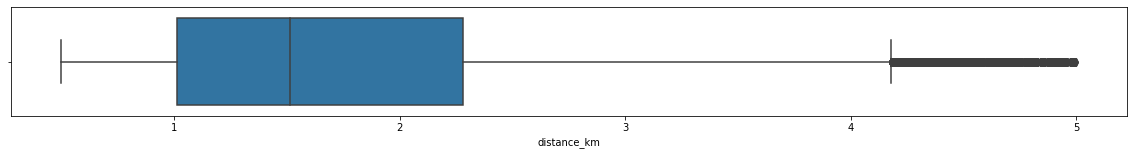

In [383]:
df_bike = df_bike.query('distance_km <= 5')
df_bike = df_bike.query('distance_km >=0.5')

plt.figure(figsize = [20, 2])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_bike, x='distance_km', color=base_color);
df_bike.shape

> #### Almost 5% of the Distance more than 1/2 Kilo meter
>> ##### remove Distance below 1/5 Kilo meter (may have same start point but different long and lat)
> #### Almost 99% of the Distance less than 5 Kilo meter
>> ##### remove Distance above 5 Kilo meter (the bike may stolen)

### 2.d Speed Outliners Checking

In [384]:
df_bike['speed_km/hr'].describe(percentiles = [0.01, 0.05, 0.95, 0.99])

count    156614.000000
mean         11.254793
std           3.472036
min           0.425196
1%            2.120529
5%            5.304396
50%          11.298891
95%          16.866389
99%          19.393296
max          27.664611
Name: speed_km/hr, dtype: float64

(153751, 28)

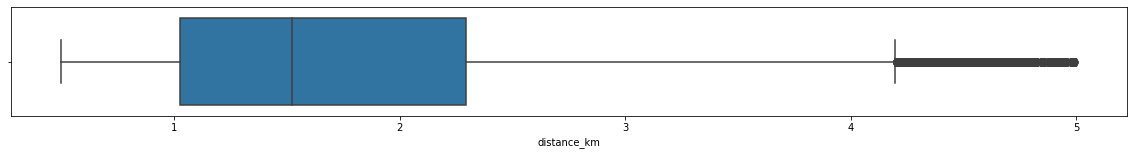

In [409]:
df_bike = df_bike[df_bike['speed_km/hr'] >=3]
plt.figure(figsize = [20, 2])
base_color = sb.color_palette()[0]
sb.boxplot(data=df_bike, x='distance_km', color=base_color);
df_bike.shape

> #### Almost 1% - 5% of the Speed between 2-5 Km/hr
>> ##### remove Speed below 3 Km/hr (the user may walking beside the bike)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Duration Age Distance Speed
> ##### 1. Duration: Outliers with period longer than 1.25 hr.
>> ##### (user may forget to end the trip)
> ##### 2. Age: Outliers with user older than 60 years old. 
>> ##### (maybe user add rondom birth year)
> ##### 3. Distance: Outliers with distance less than 0.5 Km and more than 5 Km than. 
>> ##### (first same point different lat and long and the second the bike may stolen)
> ##### 4. Speed: Outliers with speed less than 3 Km/hr. 
>> ##### (the user may walking beside the bike)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


> #### 1. Dataframe: Replace inf by null and remove all null value
> #### 2. Duration: Convert duration by (sec to hr)
> #### 3. Distance: Get the distance between two lat and long of the start and end points
> #### 4. Distance: Remove distance equel 0 (the start and the end point are same)
> #### 5. Speed: Calculate Speed (Km/hr) From the duration (hr) and the distance (Km)
> #### 6. Birth Year: Convert birth year to int
> #### 7. Age: Calculate the age of the member
> #### 8. Age Group: Calculate age group to make it easy to compare
> #### 9. Hour Day Weakday Month Quarter Season: Calculate to invesigate the distrubution per period

<a id='bivariate'></a>
## 3. Bivariate Exploration


### 3.a Duration Distribution

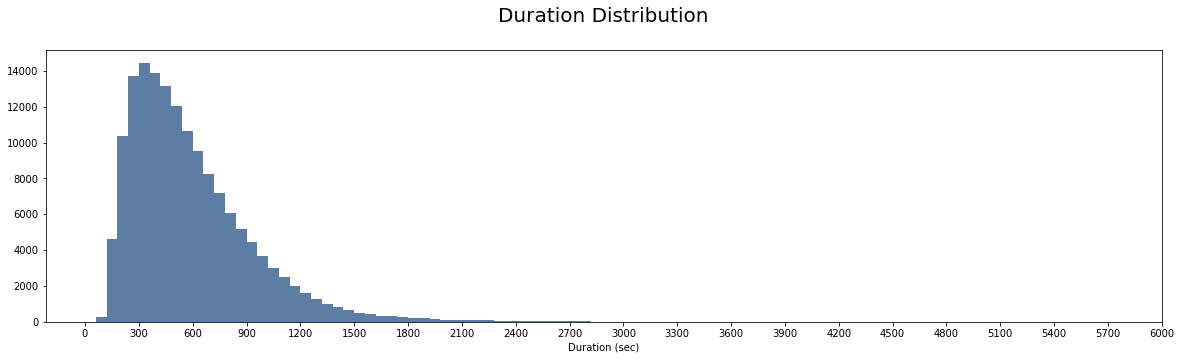

In [410]:
# Set bin size and color
bin_size = 60
bins = np.arange(0, df_bike.duration_sec.max()+bin_size, bin_size)
color = sb.color_palette('viridis')[1]

# Plotting
fig, axes = plt.subplots(figsize = (20,5))
plt.hist(df_bike.duration_sec, bins = bins, color= color, alpha=0.8);

# Aesthetic wrangling
plt.xticks(ticks = [x for x in range(0,6001,300)])
plt.title('Duration Distribution\n', size=20)
plt.xlabel('Duration (sec)');

> #### Most rides takes within 300 - 600 sec

### 3.b Speed Distribution

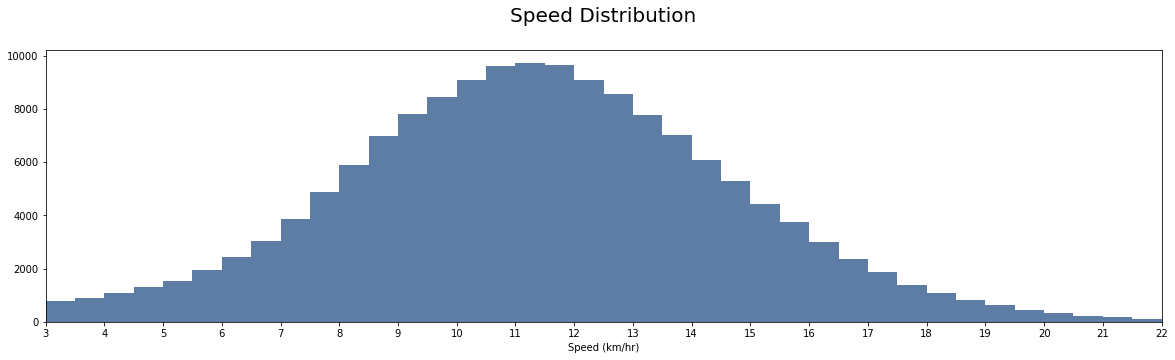

In [440]:
# Set bin size and color
bin_size = 0.5
bins = np.arange(0, df_bike['speed_km/hr'].max()+bin_size, bin_size)
color = sb.color_palette('viridis')[1]

# Plotting
fig, axes = plt.subplots(figsize = (20,5))
plt.hist(df_bike['speed_km/hr'], bins = bins, color= color, alpha=0.8);

# Aesthetic wrangling
plt.xticks(ticks = [x for x in range(0,25,1)])
plt.title('Speed Distribution\n', size=20)
plt.xlim((3,22));
plt.xlabel('Speed (km/hr)');

> #### Most rides speed within 11 - 12 Km/hr

### 3.c Age Distribution

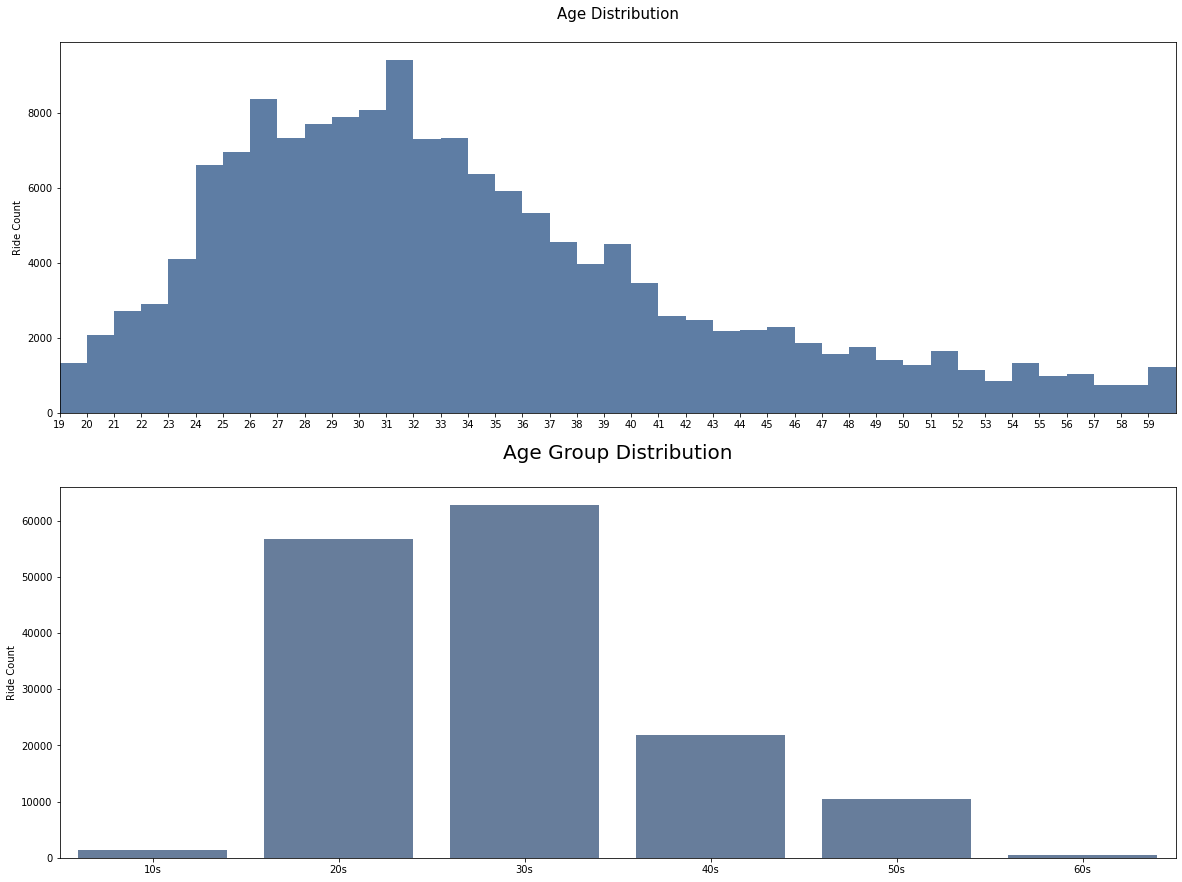

In [699]:
# Set bin size and color
bin_size = 1
bins = np.arange(0, df_bike.member_age.max()+bin_size, bin_size)
color = sb.color_palette('viridis')[1]

# Plotting
fig, axes = plt.subplots(figsize = (20,15))
plt.subplot(2, 1 , 1)
plt.hist(df_bike.member_age, bins = bins, color= color, alpha=0.8);

# Aesthetic wrangling
plt.xticks(ticks = [x for x in range(0,60,1)])
plt.title('Age Distribution\n', size=15)
plt.xlabel('Member Age', size=10);
plt.xlim((19,60));
plt.xlabel("");
plt.ylabel("Ride Count")

plt.subplot(2, 1 , 2)
sb.countplot(x = "age_group", data = df_bike,
              color = sb.color_palette('viridis')[1],
              order = ['10s','20s','30s','40s','50s','60s'], 
              alpha=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')


plt.title('Age Group Distribution\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("");


> #### 32 years old people having the highest rides count
> #### 30s having the highst rides count then 20s

### 3.d Start-End Hours Distribution

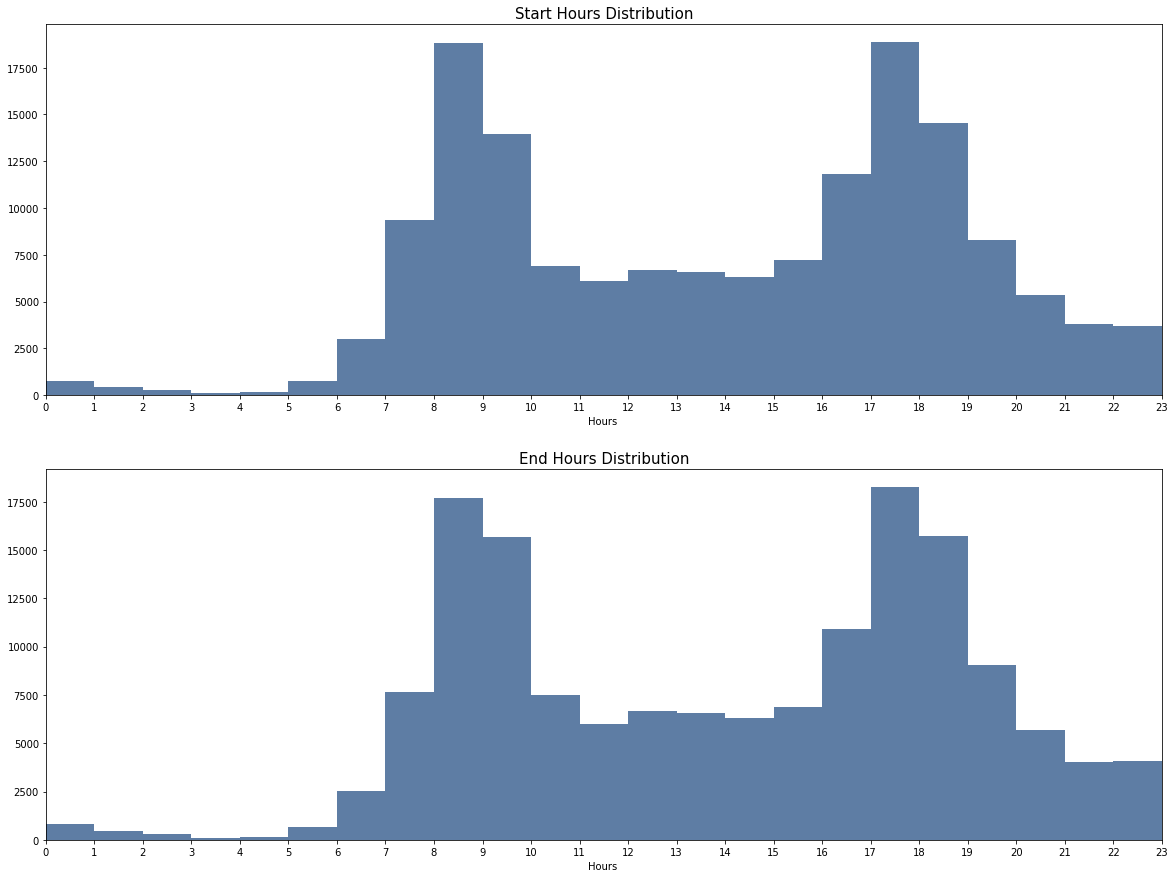

In [691]:
# Set bin size and color
bin_size = 1
bins = np.arange(0, df_bike.start_hour.max()+bin_size, bin_size)
color = sb.color_palette('viridis')[1]

# Plotting
fig, axes = plt.subplots(figsize = (20,15))
plt.subplot(2, 1 , 1)

plt.hist(df_bike.start_hour, bins = bins, color= color, alpha=0.8);

# Aesthetic wrangling
plt.xticks(ticks = [x for x in range(0,25,1)])
plt.title('Start Hours Distribution', size=15)
plt.xlabel('Hours ', size=10);
plt.xlim((0,23));

plt.subplot(2, 1 , 2)

plt.hist(df_bike.end_hour, bins = bins, color= color, alpha=0.8);

# Aesthetic wrangling
plt.xticks(ticks = [x for x in range(0,25,1)])
plt.title('End Hours Distribution', size=15)
plt.xlabel('Hours ', size=10);
plt.xlim((0,23));


> #### 8 AM -9 AM and  5 PM - 6 PM having the highest start rides count (very big chance because using bike to go work and get back )

### 3.e Days Distribution

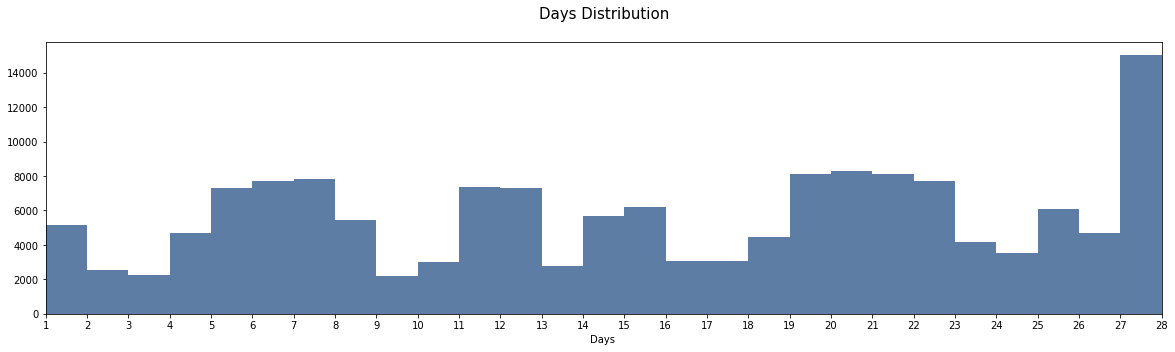

In [602]:
# Set bin size and color
bin_size = 1
bins = np.arange(0, df_bike.day.max()+bin_size, bin_size)
color = sb.color_palette('viridis')[1]

# Plotting
fig, axes = plt.subplots(figsize = (20,5))
plt.hist(df_bike.day, bins = bins, color= color, alpha=0.8);


# Aesthetic wrangling
plt.xticks(ticks = [x for x in range(1,32,1)])
plt.title('Days Distribution\n', size=15)
plt.xlabel('Days ', size=10);
plt.xlim((1,28));

> #### 28th having the highest start rides count

### 3.f Weekday Distribution

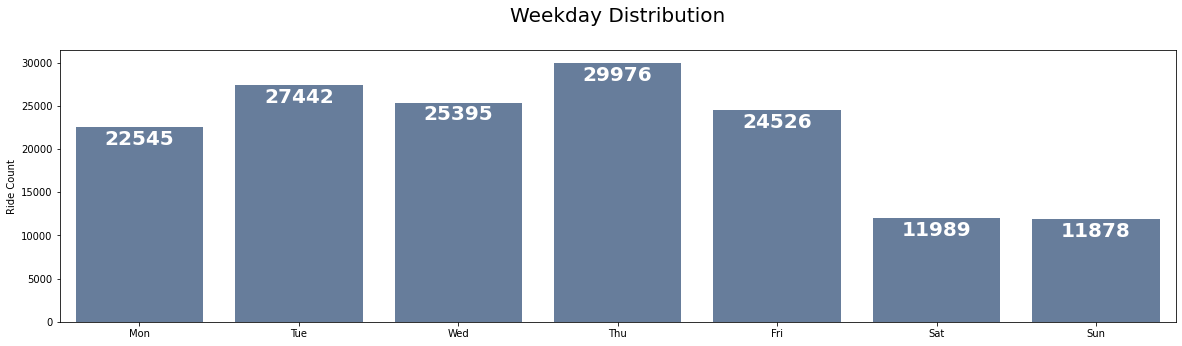

In [789]:
# Plotting 
fig, ax = plt.subplots(figsize = (20,5))
sb.countplot(x = "weekday", data = df_bike,
              color = sb.color_palette('viridis')[1],
              order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], 
              # order by weekday
              alpha=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center',
                   size=20,
                   xytext = (0, -12), 
                   textcoords = 'offset points',
                   color="white" , weight='bold'
               )


plt.title('Weekday Distribution\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("");


> #### Thursday is the most day having ride all over the weekday

### 3.g Season, Quarter and Month Distribution

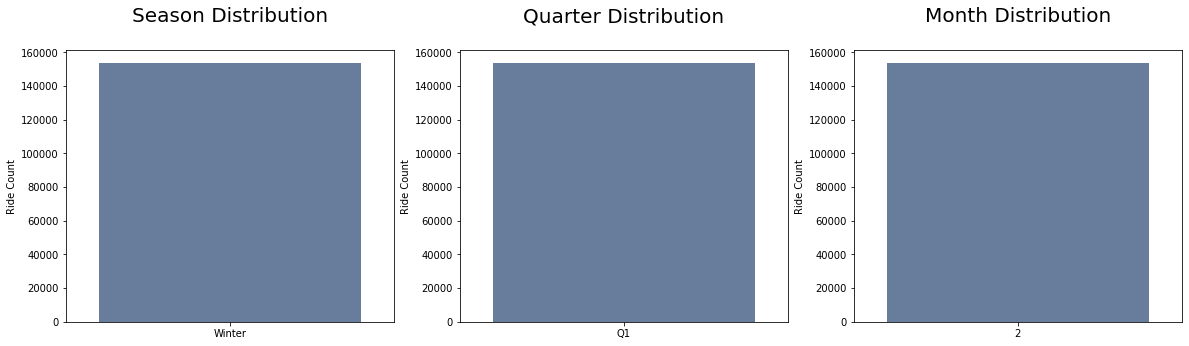

In [695]:
# Plotting 
fig, ax = plt.subplots(figsize = (20,5))
plt.subplot(1, 3, 1)

sb.countplot(x = "season", data = df_bike,
              color = sb.color_palette('viridis')[1],
              alpha=0.8)

plt.title('Season Distribution\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("")

plt.subplot(1, 3, 2)

sb.countplot(x = "quarter", data = df_bike,
              color = sb.color_palette('viridis')[1],
              alpha=0.8)

plt.title('Quarter Distribution\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("")

plt.subplot(1, 3, 3)
sb.countplot(x = "month", data = df_bike,
              color = sb.color_palette('viridis')[1],
              alpha=0.8)

plt.title('Month Distribution\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("");



> ### The data for just for one month (X-2-2019)

### 3.h Gender Distribution

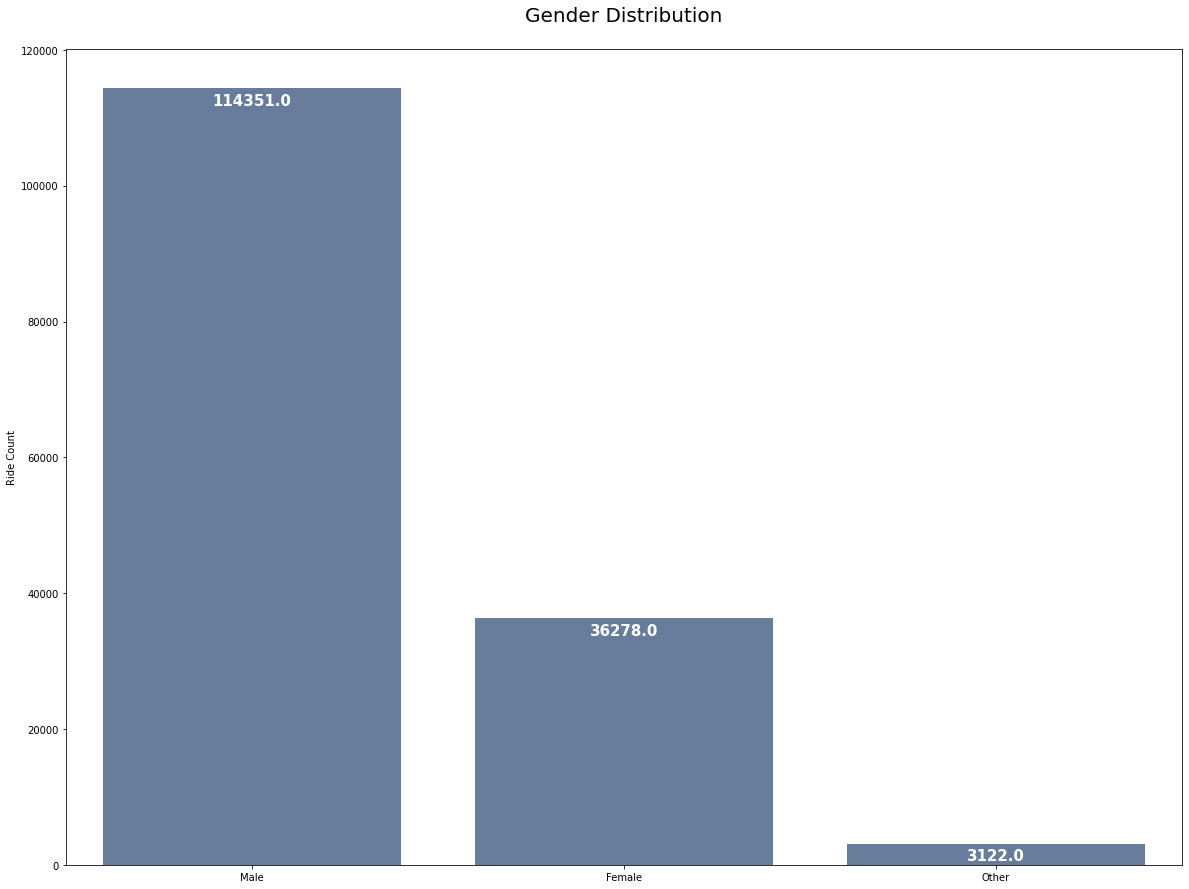

In [794]:
# Plotting 
fig, ax = plt.subplots(figsize = (20,15))
sb.countplot(x = "member_gender", data = df_bike,
              color = sb.color_palette('viridis')[1],
              order = ['Male','Female','Other'], 
              alpha=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points',
                   color="white" , weight='bold'

               )



plt.title('Gender Distribution\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("");

> #### Male having the highest bike ride counts

### 3.i User Type Distribution

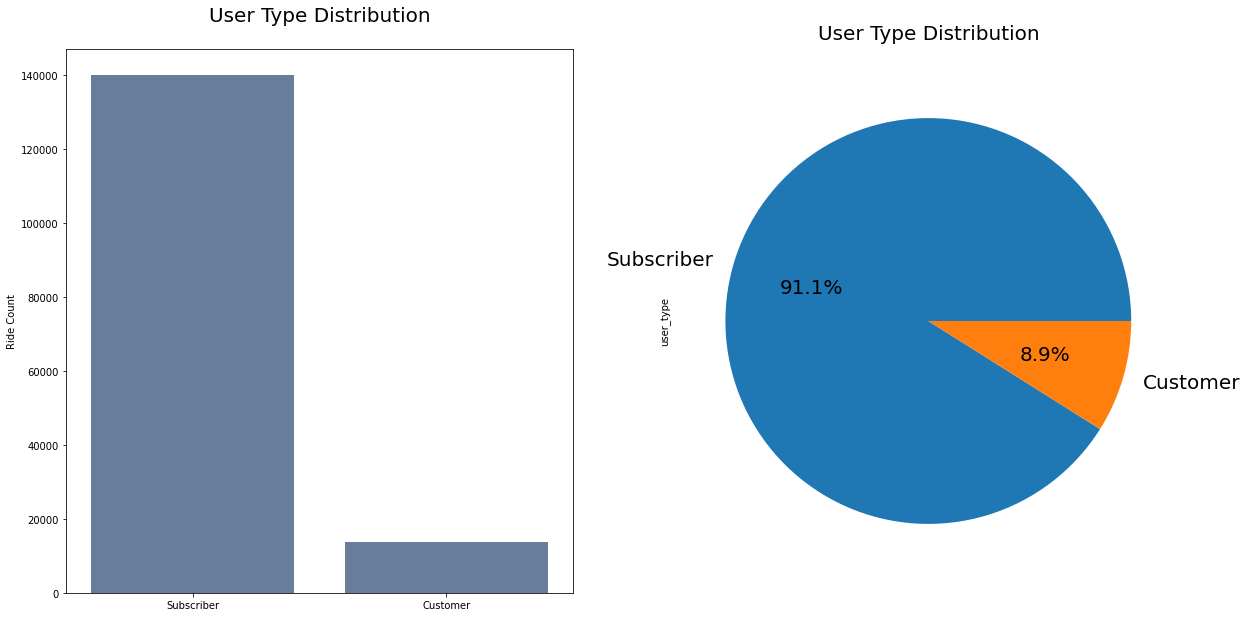

In [784]:
# Plotting 
fig, ax = plt.subplots(figsize = (20,10))
plt.subplot(1, 2 , 1)

sb.countplot(x = "user_type", data = df_bike,
              color = sb.color_palette('viridis')[1],
              alpha=0.8)

plt.title('User Type Distribution\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("");

plt.subplot(1, 2 , 2)

df_bike.user_type.value_counts().plot(kind='pie',autopct="%.1f%%" , fontsize=20)

# labels = data.keys()
# plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("User Type Distribution\n", fontsize=20);
#pie.savefig("DeliveryPieChart.png")



> #### Subscriber having 91.1% of the rides

### 3.j Location and Route Distribution

In [419]:
m = folium.Map([df_bike.start_station_latitude.mean(), df_bike.start_station_longitude.mean()], zoom_start=10)
stationArr = df_bike[['start_station_latitude', 'start_station_longitude']].values
#print(stationArr)
# plot heatmap
m.add_child(plugins.HeatMap(stationArr, radius=15))
m

> #### Rides Locations: San Francisco , Oakland and San Jose

In [420]:
distance_km_max =df_bike [ df_bike.distance_km      ==df_bike.distance_km.max()]
print ('The Longest Ride Distance', "{:.0f} km".format(df_bike.distance_km.max()),'From', distance_km_max['start_station_name'].values[0] ,'To',distance_km_max['end_station_name'].values[0] )
m = folium.Map([distance_km_max.start_station_latitude.mean(), distance_km_max.start_station_longitude.mean()], zoom_start=12)
stationArr = [tuple(distance_km_max[['start_station_latitude', 'start_station_longitude']].values[0]) , tuple(distance_km_max[['end_station_latitude', 'end_station_longitude']].values[0])]
folium.PolyLine(stationArr,
color='red',
weight=10,
opacity=0.5).add_to(m)

m



The Longest Ride Distance 5 km From Fell St at Stanyan St To Folsom St at 3rd St


> #### The Longest Ride Distance 5 km From Fell St at Stanyan St To Folsom St at 3rd St

In [421]:
distance_km_min =df_bike [ df_bike.distance_km  ==df_bike.distance_km.min()]

print ('The Shortest Ride Distance', "{:.1f} km".format(df_bike.distance_km.min()),'From', distance_km_min['start_station_name'].values[0] ,'To',distance_km_min['end_station_name'].values[0] )
m = folium.Map([distance_km_min.start_station_latitude.mean(), distance_km_min.start_station_longitude.mean()], zoom_start=15)
stationArr = [tuple(distance_km_min[['start_station_latitude', 'start_station_longitude']].values[0]) , tuple(distance_km_min[['end_station_latitude', 'end_station_longitude']].values[0])]
folium.PolyLine(stationArr,
color='blue',
weight=10,
opacity=0.5).add_to(m)
m



The Shortest Ride Distance 0.5 km From North Berkeley BART Station To West St at University Ave


> #### The Shortest Ride Distance 0.5 km From North Berkeley BART Station To West St at University Ave

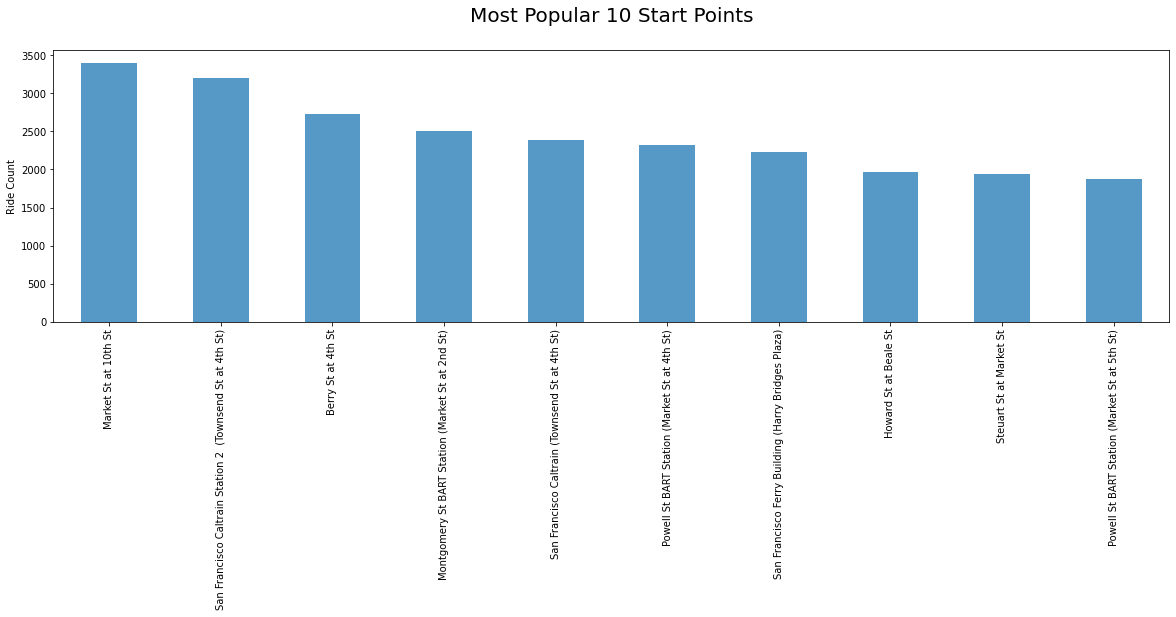

In [482]:
df_bike.start_station_name.value_counts()[:10].plot(kind='bar',figsize = (20,5)  ,alpha=0.75, rot=90)
plt.title('Most Popular 10 Start Points\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("");

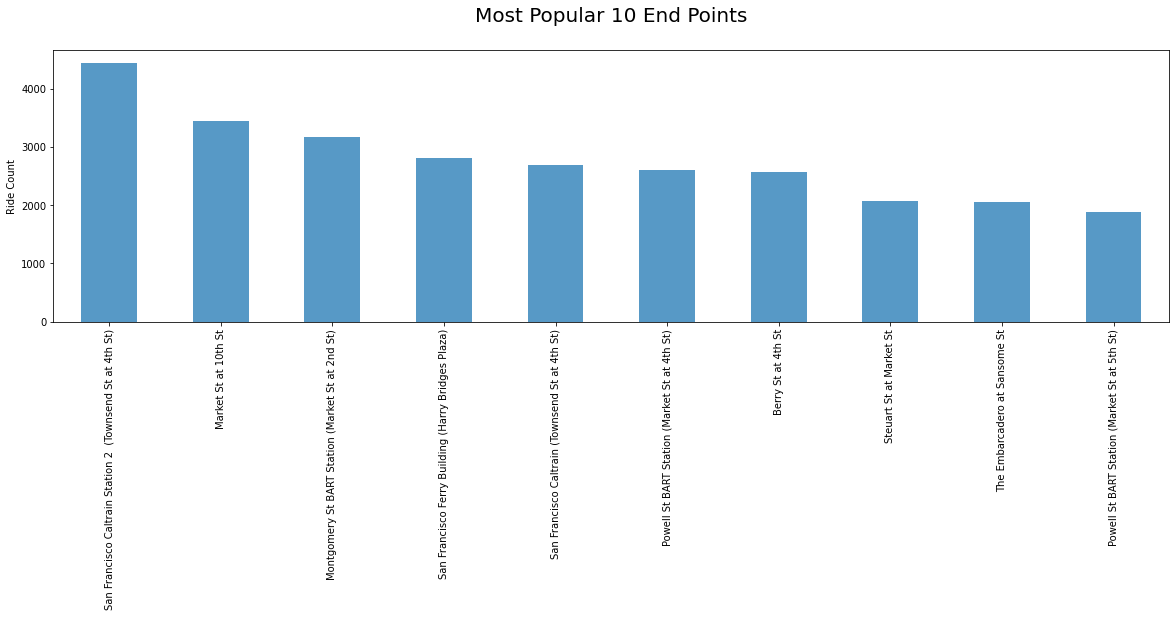

In [481]:
df_bike.end_station_name.value_counts()[:10].plot(kind='bar',figsize = (20,5)  ,alpha=0.75, rot=90)
plt.title('Most Popular 10 End Points\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("");

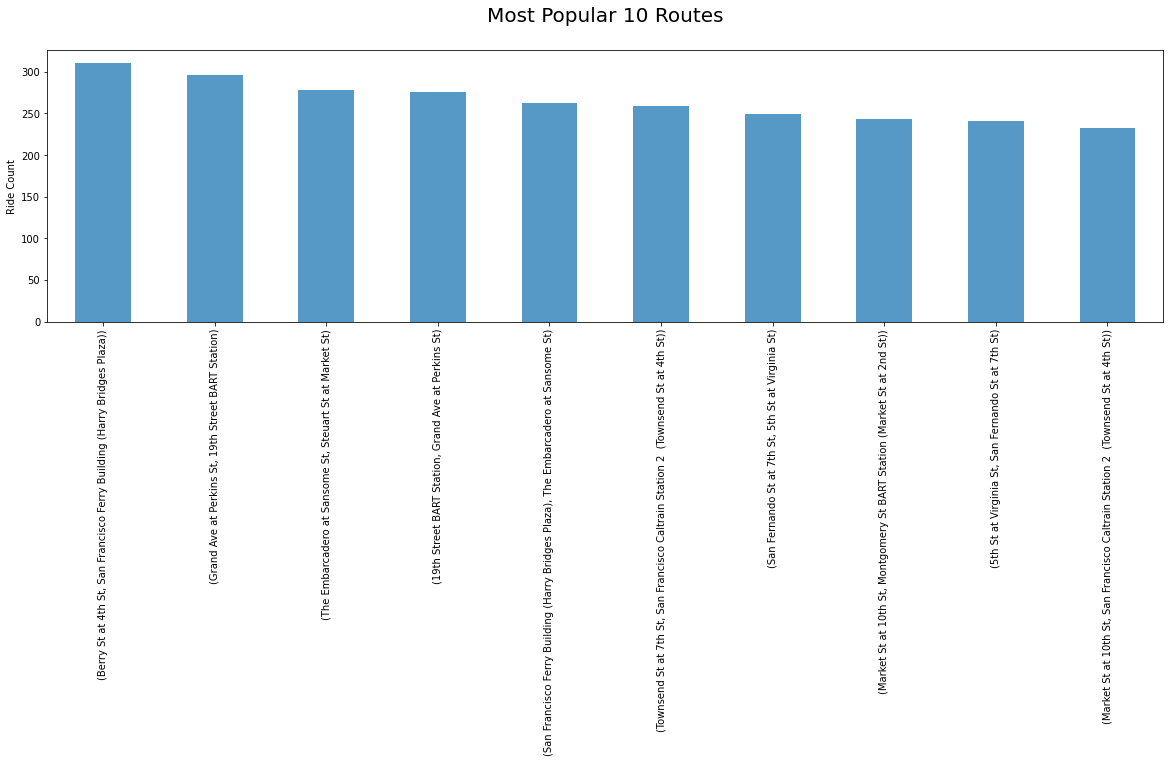

In [490]:
df_bike[['start_station_name','end_station_name']].value_counts()[:10].plot(kind='bar',figsize = (20,5)  ,alpha=0.75, rot=90)
plt.title('Most Popular 10 Routes\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("");

In [528]:
df_bike[['start_station_name','end_station_name']].value_counts()[:1]
most_common_rount =df_bike[ ( df_bike['start_station_name']=='Berry St at 4th St')
                            & (df_bike['end_station_name'] =='San Francisco Ferry Building (Harry Bridges Plaza)')][:1]
most_common_rount_lon_lat = [tuple(most_common_rount[['start_station_latitude', 'start_station_longitude']].values[0]) , tuple(most_common_rount[['end_station_latitude', 'end_station_longitude']].values[0])]
print ('The Most Popular Route', "{:.1f} km".format( most_common_rount.distance_km.values[0]),'From', most_common_rount['start_station_name'].values[0] ,'To',most_common_rount['end_station_name'].values[0] )
m = folium.Map([most_common_rount_lon_lat[0][0] ,most_common_rount_lon_lat[0][1]], zoom_start=15)
folium.PolyLine(most_common_rount_lon_lat,
color='black',
weight=10,
opacity=0.5).add_to(m)
m

The Most Popular Route 1.3 km From Berry St at 4th St To San Francisco Ferry Building (Harry Bridges Plaza)


> ### The Most Popular Route 1.3 km From Berry St at 4th St To San Francisco Ferry Building (Harry Bridges Plaza)


<br>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> ### Time
>> 1. Most rides takes within 300 - 600 sec
>> 2. 8 AM -9 AM and 5 PM - 6 PM having the highest start rides count (very big chance because using bike to go work and get back )
>> 3. 28th having the highest start rides count
>> 4. Thursday is the most day having ride all over the weekday¶
>> 5. The data for just for one month (X-2-2019)
> ### Speed
>> 1. Most rides speed within 11 - 12 Km/hr
> ### Age
>> 1. 32 years old people having the highest rides count
>> 2. 30s having the highst rides count then 20s
> ### Gender
>> 1. Male having the highest bike ride counts
> ### User Type
>> 1. Subscriber having 91.1% of the rides
> ### Location
>> 1. Rides Locations: San Francisco , Oakland and San Jose
>> 2. The Longest Ride Distance 5 km From Fell St at Stanyan St To Folsom St at 3rd St
>> 3. The Shortest Ride Distance 0.5 km From North Berkeley BART Station To West St at University Ave
>> 4. The Most Popular Route 1.3 km From Berry St at 4th St To San Francisco Ferry Building (Harry Bridges Plaza)


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In comparing the user type and the age group there is almost no customer 10s or 60s

<a id='multivariate'></a>
## 4. Multivariate Exploration

### 4.a User Type Vs. Gender

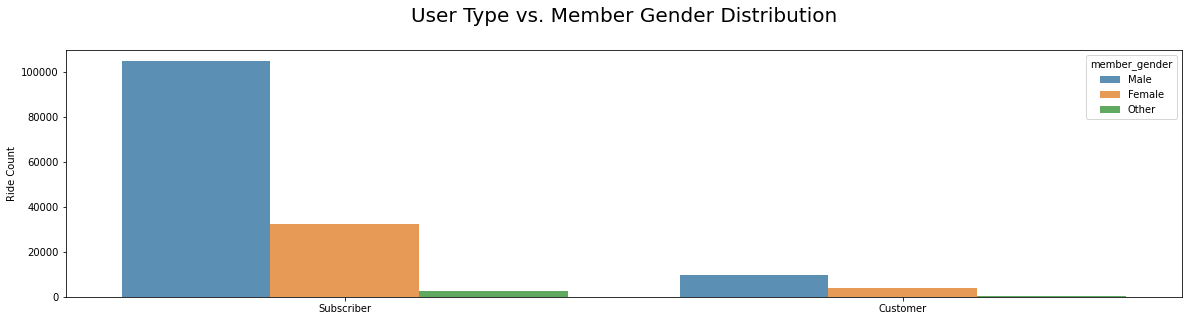

In [823]:
# Plotting 
fig, ax = plt.subplots(figsize = (20,10))
plt.subplot(2, 1, 1)
sb.countplot( hue='member_gender',x= "user_type", data = df_bike,
              alpha=0.8)

plt.title('User Type vs. Member Gender Distribution\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("");

> #### Male Subscriber having the high rides count

### 4.b User Type Vs. Gender Vs. Age Group

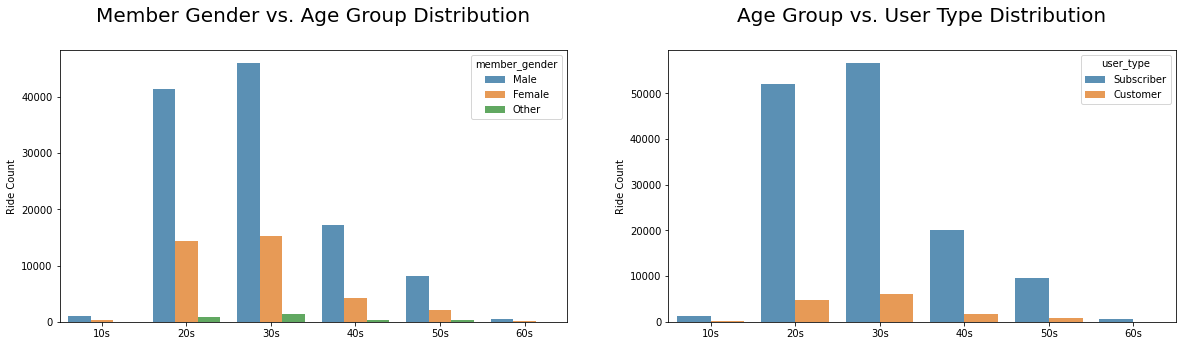

In [824]:
# Plotting 

fig, ax = plt.subplots(figsize = (20,5))
plt.subplot(1, 2, 1)
sb.countplot( hue='member_gender',x= "age_group", data = df_bike,
            order = ['10s','20s','30s','40s','50s','60s'], 
              alpha=0.8)

plt.title('Member Gender vs. Age Group Distribution\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("")

plt.subplot(1, 2, 2)

sb.countplot( x='age_group',hue= "user_type", data = df_bike,
              order = ['10s','20s','30s','40s','50s','60s'], 
              alpha=0.8)

plt.title('Age Group vs. User Type Distribution\n', size=20)
plt.ylabel("Ride Count")
plt.xlabel("")
plt.show()

> #### Male Subscrber having the Most Rides specially of group age 20s-30s 

### 4.c Gender Vs. Weekday  Vs Duration, Distance and Speed

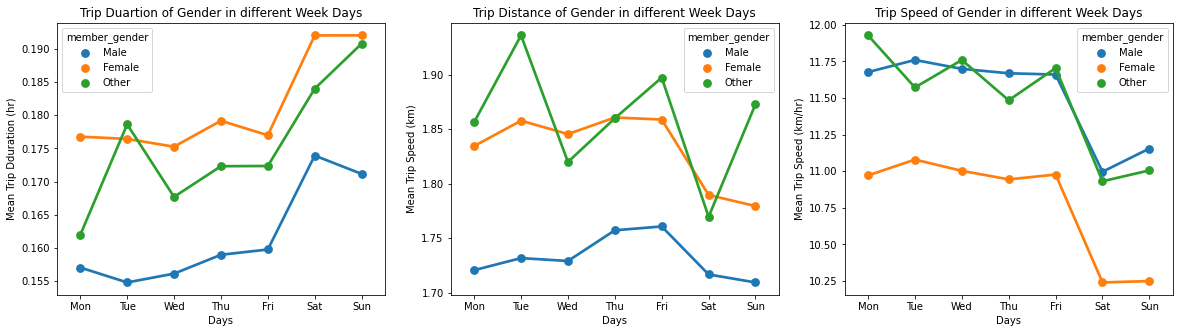

In [829]:
fig = plt.figure(figsize = (20,5))
plt.subplot(1, 3, 1)
sb.pointplot(data = df_bike, x = 'weekday', y = 'duration_hr', hue = 'member_gender', ci=None,order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Duartion of Gender in different Week Days')
plt.ylabel('Mean Trip Dduration (hr)')
plt.xlabel('Days')

plt.subplot(1, 3, 2)
sb.pointplot(data = df_bike, x = 'weekday', y = 'distance_km', hue = 'member_gender', ci=None,order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Distance of Gender in different Week Days')
plt.ylabel('Mean Trip Speed (km)')
plt.xlabel('Days')



plt.subplot(1, 3, 3)
sb.pointplot(data = df_bike, x = 'weekday', y = 'speed_km/hr', hue = 'member_gender', ci=None,order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Speed of Gender in different Week Days')
plt.ylabel('Mean Trip Speed (km/hr)')
plt.xlabel('Days')


plt.show();


> #### Generally Gender increating by the week end 
> #### Female having the longest Duration riding and Male having the less
> #### Others having the lonest distance then Females, it make sense they take more time
> #### Both Male and female riding more distance by Thu , Fri and having less distance by the week end
> #### Male almost having the faster Speed
> #### Male,Female and Others riding slower by the week end

### 4.d User Type Vs. Weekday  Vs Duration, Distance and Speed

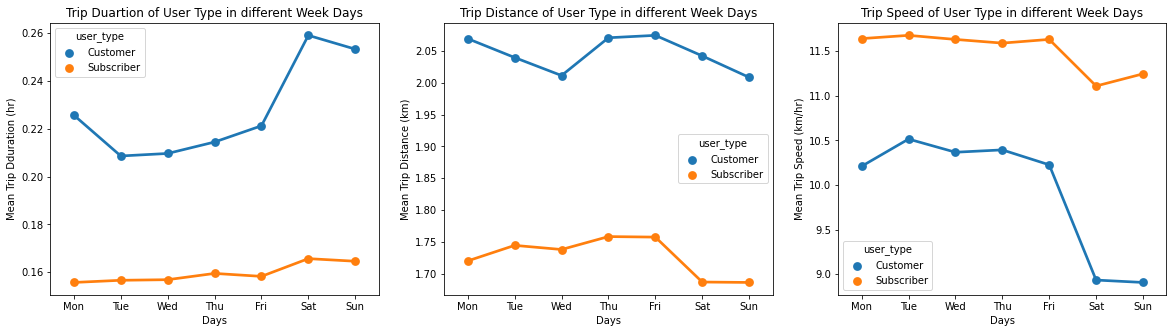

In [831]:
fig = plt.figure(figsize = (20,5))
plt.subplot(1, 3, 1)
sb.pointplot(data = df_bike.sort_values(by=['user_type']), 
             x = 'weekday', 
             y = 'duration_hr',
             hue = 'user_type', 
             ci=None,
             order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Duartion of User Type in different Week Days')
plt.ylabel('Mean Trip Dduration (hr)')
plt.xlabel('Days')


plt.subplot(1, 3, 2)
sb.pointplot(data = df_bike.sort_values(by=['user_type']), 
             x = 'weekday', 
             y = 'distance_km',
             hue = 'user_type', 
             ci=None,
             order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Distance of User Type in different Week Days')
plt.ylabel('Mean Trip Distance (km)')
plt.xlabel('Days')



plt.subplot(1, 3, 3)
sb.pointplot(data = df_bike.sort_values(by=['user_type']), 
             x = 'weekday', 
             y = 'speed_km/hr',
             hue = 'user_type', 
             ci=None,
             order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Speed of User Type in different Week Days')
plt.ylabel('Mean Trip Speed (km/hr)')
plt.xlabel('Days')

plt.show();


> #### Customer hacing the longest duration
> #### Both Riding longer duration by week end
> #### Customer hacing the longest distance
> #### Both Riding less distance by week end
> #### Both Riding slower by the week end
> #### Subscriber hacing the higest speed


### 4.e Age Vs. Weekday  Vs Duration, Distance and Speed

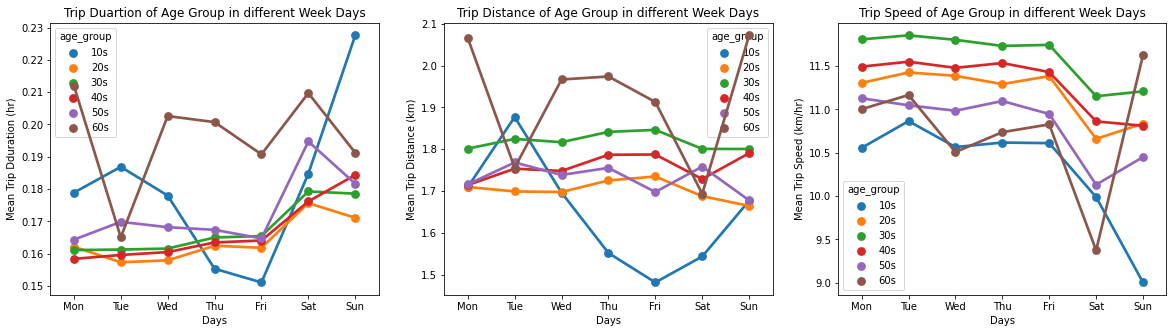

In [832]:
fig = plt.figure(figsize = (20,5))
plt.subplot(1, 3, 1)
sb.pointplot(data = df_bike.sort_values(by=['age_group']), 
             x = 'weekday', 
             y = 'duration_hr',
             hue = 'age_group', 
             ci=None,
             order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Duartion of Age Group in different Week Days')
plt.ylabel('Mean Trip Dduration (hr)')
plt.xlabel('Days')


plt.subplot(1, 3, 2)
sb.pointplot(data = df_bike.sort_values(by=['age_group']), 
             x = 'weekday', 
             y = 'distance_km',
             hue = 'age_group', 
             ci=None,
             order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Distance of Age Group in different Week Days')
plt.ylabel('Mean Trip Distance (km)')
plt.xlabel('Days')


plt.subplot(1, 3, 3)
sb.pointplot(data = df_bike.sort_values(by=['age_group']), 
             x = 'weekday', 
             y = 'speed_km/hr',
             hue = 'age_group', 
             ci=None,
             order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title('Trip Speed of Age Group in different Week Days')
plt.ylabel('Mean Trip Speed (km/hr)')
plt.xlabel('Days')

plt.show();


> #### 10s having slowest riding speed (more time and less distance)
> #### 60s having second place duraction with 1st place distance and speed 
> #### All Duration decreased by the week end except 10s
> #### All Speed decreased by the week end except 60s

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> ### User Type Vs. Gender
>> #### 1. Male Subscriber having the high rides count
> ### User Type Vs. Gender Vs. Age Group
>> #### 1. Male Subscrber having the Most Rides specially of group age 20s-30s
> ### Gender Vs. Weekday Vs Duration, Distance and Speed
>> #### 1. Generally Gender increating by the week end¶
>> #### 2. Female having the longest Duration riding and Male having the less
>> #### 3. Others having the lonest distance then Females, it make sense they take more time
>> #### 4. Both Male and female riding more distance by Thu , Fri and having less distance by the week end
>> #### 5. Male almost having the faster Speed
>> #### 6. Male,Female and Others riding slower by the week end
> ### User Type Vs. Weekday Vs Duration, Distance and Speed
>> #### 1. Customer hacing the longest duration¶
>> #### 2. Both Riding longer duration by week end
>> #### 3. Customer hacing the longest distance
>> #### 4. Both Riding less distance by week end
>> #### 5. Both Riding slower by the week end
>> #### 6. Subscriber hacing the higest speed
> ### Age Vs. Weekday  Vs Duration, Distance and Speed
>> #### 1. 10s having slowest riding speed (more time and less distance)
>> #### 2. 60s having second place duraction with 1st place distance and speed
>> #### 3. All Duration decreased by the week end except 10s
>> #### 4. All Speed decreased by the week end except 60s

### Were there any interesting or surprising interactions between features?
>> #### 1. Customer hacing the longest distance
>> #### 2. Subscriber hacing the higest speed


In [834]:
df_bike.to_csv('Ford_bike.csv',index=False)